# Predicting Scholarship Eligibility with Machine Learning: A Binary Classification Approach

### Prepare environment (Install requied libraries)

In [1]:
%pip install pandas scikit-learn matplotlib seaborn tensorflow

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Preprocess Data

In [2]:
import pandas as pd

# Load dataset 
df = pd.read_csv('Student Performance.csv')

# Drop the unnecessary columns
columns_to_omit = ['StudentID', 'Age', 'Sports', 'Music', 'Volunteering', 'GPA']
df_reduced = df.drop(columns=columns_to_omit)

# Map the GradeClass values
gradeclass_mapping = {0: 1, 1: 1, 2: 0, 3: 0, 4: 0}
df_reduced['GradeClass'] = df_reduced['GradeClass'].map(gradeclass_mapping)

# Save the new dataset named Data
Data = df_reduced
print(Data.head())

Data.to_csv('Data.csv', index=False)

   Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  Tutoring  \
0       1          0                  2        19.833723         7         1   
1       0          0                  1        15.408756         0         0   
2       0          2                  3         4.210570        26         0   
3       1          0                  3        10.028829        14         0   
4       1          0                  2         4.672495        17         1   

   ParentalSupport  Extracurricular  GradeClass  
0                2                0           0  
1                1                0           1  
2                2                0           0  
3                3                1           0  
4                3                0           0  


### Load and inspect dataset

In [3]:
import pandas as pd

# Load dataset
Data = pd.read_csv('Data.csv')

# Display first 5 rows
print(Data.head())

# Check for missing values
print(Data.isnull().sum())

# Quick summary of data types
print(Data.info())




   Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  Tutoring  \
0       1          0                  2        19.833723         7         1   
1       0          0                  1        15.408756         0         0   
2       0          2                  3         4.210570        26         0   
3       1          0                  3        10.028829        14         0   
4       1          0                  2         4.672495        17         1   

   ParentalSupport  Extracurricular  GradeClass  
0                2                0           0  
1                1                0           1  
2                2                0           0  
3                3                1           0  
4                3                0           0  
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
GradeClass           0
dtype: int64

### Process Data

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate features and target
X = Data.drop('GradeClass', axis=1)
y = Data['GradeClass']

# Categorical, ordinal, continuous
cat_features = ['Gender', 'Ethnicity', 'Tutoring', 'Extracurricular']
ordinal_features = ['ParentalEducation', 'ParentalSupport']
cont_features = ['StudyTimeWeekly', 'Absences']

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), cat_features),
    ('ord', 'passthrough', ordinal_features),
    ('cont', StandardScaler(), cont_features)
])

X_preprocessed = preprocessor.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42, stratify=y)


### Train Models

#### Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]


#### Support Vector Machine (SVM)

In [6]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)[:, 1]


#### Neural Network (Deep Learning)

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Neural network architecture
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_split=0.2)

# Predict
y_proba_nn = model.predict(X_test).ravel()
y_pred_nn = (y_proba_nn >= 0.5).astype(int)


2025-05-13 21:31:09.307637: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-13 21:31:09.320741: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-13 21:31:09.645834: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-13 21:31:09.761360: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747189870.010506 1993982 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747189870.06

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


### Evaluate Model Performance

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(y_test, y_pred, y_proba):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    return accuracy, precision, recall, f1, auc

# Evaluate all models
results = {
    'Logistic Regression': evaluate_model(y_test, y_pred_logreg, y_proba_logreg),
    'SVM': evaluate_model(y_test, y_pred_svm, y_proba_svm),
    'Neural Network': evaluate_model(y_test, y_pred_nn, y_proba_nn)
}

# Display results
result_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']).T
print(result_df)


                     Accuracy  Precision    Recall  F1-Score   AUC-ROC
Logistic Regression  0.915042   0.842105  0.566372  0.677249  0.889622
SVM                  0.910864   0.818182  0.557522  0.663158  0.889424
Neural Network       0.916435   0.778947  0.654867  0.711538  0.896043


### Plot ROC Curves

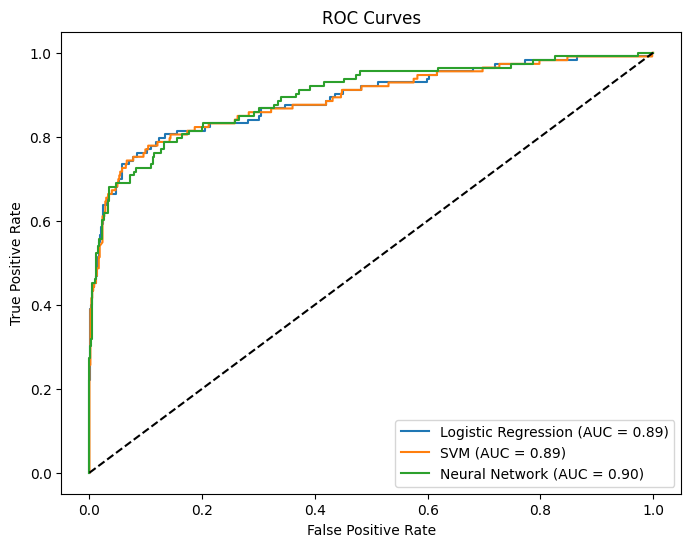

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

plt.figure(figsize=(8,6))

# Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_logreg)
plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_logreg)))

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_svm)))

# Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn)
plt.plot(fpr_nn, tpr_nn, label='Neural Network (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_nn)))

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


### Calculation of Cross Validation Score

In [10]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neural_network import MLPClassifier

# Define Neural Network model (example architecture)
nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
                         solver='adam', max_iter=500, random_state=42)
# Create stratified k-fold (k=5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression
logreg_scores = cross_val_score(logreg, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Logistic Regression CV Accuracy: {logreg_scores.mean():.3f} ± {logreg_scores.std():.3f}")

# Support Vector Machine (SVM)
svm_scores = cross_val_score(svm, X_train, y_train, cv=cv, scoring='accuracy')
print(f"SVM CV Accuracy: {svm_scores.mean():.3f} ± {svm_scores.std():.3f}")

# Neural Network
nn_scores = cross_val_score(nn_model, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Neural Network CV Accuracy: {nn_scores.mean():.3f} ± {nn_scores.std():.3f}")


Logistic Regression CV Accuracy: 0.908 ± 0.015
SVM CV Accuracy: 0.906 ± 0.016


/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network CV Accuracy: 0.901 ± 0.010


/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Confusion Matrix

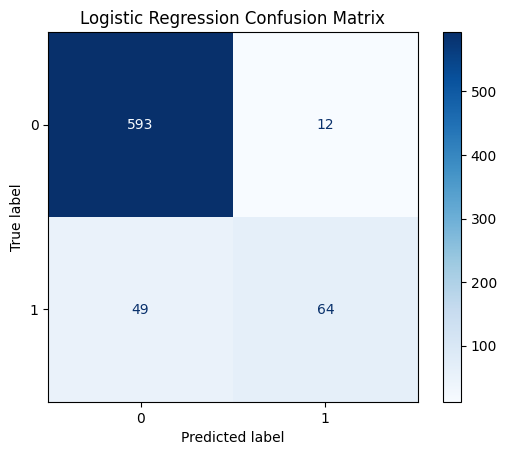

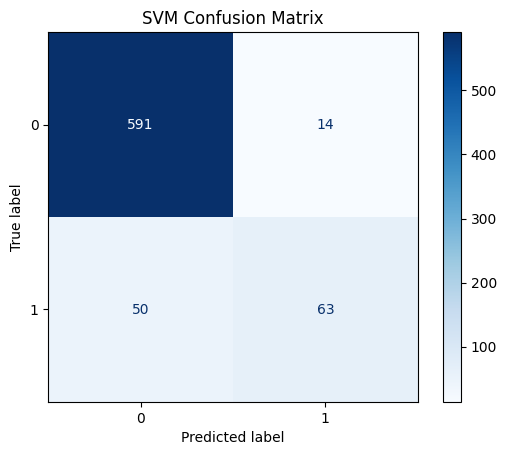

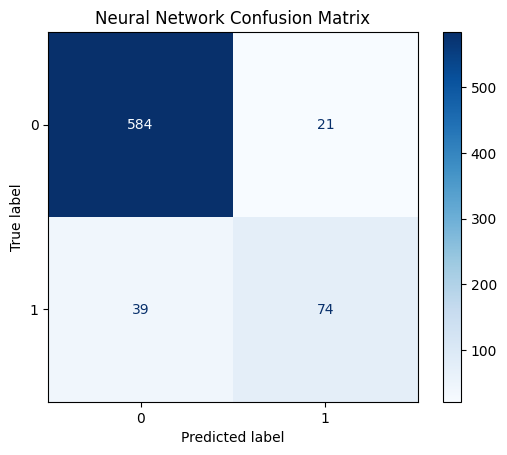

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=[0, 1])
disp_logreg.plot(cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=[0, 1])
disp_svm.plot(cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()

# Neural Network Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=[0, 1])
disp_nn.plot(cmap='Blues')
plt.title('Neural Network Confusion Matrix')
plt.show()
